In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping


In [12]:
data = pd.read_excel(r'D:\1\Load\DataSet\LoadTexasERCOT.xlsx' )
data.head()


,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,2012-01-01 01:00:00.003,7748.160500,878.438488,1289.746813,652.153054,8648.989316,2105.379142,4162.162310,849.000892,26334.030515
1,2012-01-01 01:59:59.997,7559.728089,839.092904,1294.272245,643.483530,8553.212708,2047.755534,4070.416593,845.097363,25853.058967
2,2012-01-01 03:00:00.000,7337.789042,817.995707,1296.491345,631.940923,8461.317967,1961.909818,3946.994332,840.902848,25295.341984
3,2012-01-01 04:00:00.003,7161.895539,814.967883,1297.417294,631.428520,8438.693857,1893.148232,3884.929253,845.452257,24967.932835
4,2012-01-01 04:59:59.997,6984.460743,843.952579,1309.534911,640.892563,8565.433348,1867.358425,3911.610238,862.369386,24985.612193


In [13]:
data = pd.read_excel(r'D:\1\Load\DataSet\WeatherStation1.xlsx' )
data.head()


,Year,Month,Day,Hour,Minute,Relative Humidity,Temperature,Pressure
0,2012,1,1,0,30,39.19,6,950
1,2012,1,1,1,30,44.45,5,950
2,2012,1,1,2,30,53.94,4,950
3,2012,1,1,3,30,63.77,2,960
4,2012,1,1,4,30,71.93,2,960


In [14]:
data = pd.read_excel(r'D:\1\Load\DataSet\WeatherStation2.xlsx' )
data.head()


,Year,Month,Day,Hour,Minute,Relative Humidity,Temperature,Pressure
0,2012,1,1,0,30,63.98,8,950
1,2012,1,1,1,30,49.59,6,950
2,2012,1,1,2,30,46.28,4,950
3,2012,1,1,3,30,52.89,3,960
4,2012,1,1,4,30,62.81,3,960


In [15]:
data = pd.read_excel(r'D:\1\Load\DataSet\WeatherStation3.xlsx' )
data.head()


,Year,Month,Day,Hour,Minute,Relative Humidity,Temperature,Pressure
0,2012,1,1,0,30,42.80,6,960
1,2012,1,1,1,30,56.15,5,960
2,2012,1,1,2,30,63.72,3,960
3,2012,1,1,3,30,69.80,2,960
4,2012,1,1,4,30,74.92,1,970


In [19]:
# Code for Scratch

In [20]:
import pandas as pd

# Load the data from the Excel files
load_data = pd.read_excel(r'D:\1\Load\DataSet\LoadTexasERCOT.xlsx')
weather1 = pd.read_excel(r'D:\1\Load\DataSet\WeatherStation1.xlsx')
weather2 = pd.read_excel(r'D:\1\Load\DataSet\WeatherStation2.xlsx')
weather3 = pd.read_excel(r'D:\1\Load\DataSet\WeatherStation3.xlsx')

# Check the first few rows of each dataset
print(load_data.head())
print(weather1.head())
print(weather2.head())
print(weather3.head())


                 Hour_End        COAST        EAST     FAR_WEST       NORTH  \
0 2012-01-01 01:00:00.003  7748.160500  878.438488  1289.746813  652.153054   
1 2012-01-01 01:59:59.997  7559.728089  839.092904  1294.272245  643.483530   
2 2012-01-01 03:00:00.000  7337.789042  817.995707  1296.491345  631.940923   
3 2012-01-01 04:00:00.003  7161.895539  814.967883  1297.417294  631.428520   
4 2012-01-01 04:59:59.997  6984.460743  843.952579  1309.534911  640.892563   

       NORTH_C     SOUTHERN      SOUTH_C        WEST         ERCOT  
0  8648.989316  2105.379142  4162.162310  849.000892  26334.030515  
1  8553.212708  2047.755534  4070.416593  845.097363  25853.058967  
2  8461.317967  1961.909818  3946.994332  840.902848  25295.341984  
3  8438.693857  1893.148232  3884.929253  845.452257  24967.932835  
4  8565.433348  1867.358425  3911.610238  862.369386  24985.612193  
   Year  Month  Day  Hour  Minute  Relative Humidity  Temperature  Pressure
0  2012      1    1     0      30  

In [21]:
# Convert 'Hour_End' to datetime format (if not already)
load_data['Hour_End'] = pd.to_datetime(load_data['Hour_End'])

# Extract year, month, day, hour, and minute from 'Hour_End'
load_data['Year'] = load_data['Hour_End'].dt.year
load_data['Month'] = load_data['Hour_End'].dt.month
load_data['Day'] = load_data['Hour_End'].dt.day
load_data['Hour'] = load_data['Hour_End'].dt.hour
load_data['Minute'] = load_data['Hour_End'].dt.minute

# Now, the load_data dataframe has the necessary time-based columns
print(load_data.head())


                 Hour_End        COAST        EAST     FAR_WEST       NORTH  \
0 2012-01-01 01:00:00.003  7748.160500  878.438488  1289.746813  652.153054   
1 2012-01-01 01:59:59.997  7559.728089  839.092904  1294.272245  643.483530   
2 2012-01-01 03:00:00.000  7337.789042  817.995707  1296.491345  631.940923   
3 2012-01-01 04:00:00.003  7161.895539  814.967883  1297.417294  631.428520   
4 2012-01-01 04:59:59.997  6984.460743  843.952579  1309.534911  640.892563   

       NORTH_C     SOUTHERN      SOUTH_C        WEST         ERCOT  Year  \
0  8648.989316  2105.379142  4162.162310  849.000892  26334.030515  2012   
1  8553.212708  2047.755534  4070.416593  845.097363  25853.058967  2012   
2  8461.317967  1961.909818  3946.994332  840.902848  25295.341984  2012   
3  8438.693857  1893.148232  3884.929253  845.452257  24967.932835  2012   
4  8565.433348  1867.358425  3911.610238  862.369386  24985.612193  2012   

   Month  Day  Hour  Minute  
0      1    1     1       0  
1      1

In [22]:
# Check the columns in each weather dataset
print(weather1.columns)
print(weather2.columns)
print(weather3.columns)

# Rename the columns to ensure consistency (if necessary)
weather1.rename(columns={"Year": "Year", "Month": "Month", "Day": "Day", "Hour": "Hour", "Minute": "Minute"}, inplace=True)
weather2.rename(columns={"Year": "Year", "Month": "Month", "Day": "Day", "Hour": "Hour", "Minute": "Minute"}, inplace=True)
weather3.rename(columns={"Year": "Year", "Month": "Month", "Day": "Day", "Hour": "Hour", "Minute": "Minute"}, inplace=True)

# Check the updated column names
print(weather1.columns)
print(weather2.columns)
print(weather3.columns)


Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Relative Humidity',
       'Temperature', 'Pressure'],
      dtype='object')
Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Relative Humidity',
       'Temperature', 'Pressure'],
      dtype='object')
Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Relative Humidity',
       'Temperature', 'Pressure'],
      dtype='object')
Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Relative Humidity',
       'Temperature', 'Pressure'],
      dtype='object')
Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Relative Humidity',
       'Temperature', 'Pressure'],
      dtype='object')
Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Relative Humidity',
       'Temperature', 'Pressure'],
      dtype='object')


In [23]:
# Merge the load data with weather data on Year, Month, Day, Hour, and Minute
merged_data = load_data.merge(weather1, on=["Year", "Month", "Day", "Hour", "Minute"], how="inner")
merged_data = merged_data.merge(weather2, on=["Year", "Month", "Day", "Hour", "Minute"], how="inner")
merged_data = merged_data.merge(weather3, on=["Year", "Month", "Day", "Hour", "Minute"], how="inner")

# Check the merged data
print(merged_data.head())


Empty DataFrame
Columns: [Hour_End, COAST, EAST, FAR_WEST, NORTH, NORTH_C, SOUTHERN, SOUTH_C, WEST, ERCOT, Year, Month, Day, Hour, Minute, Relative Humidity_x, Temperature_x, Pressure_x, Relative Humidity_y, Temperature_y, Pressure_y, Relative Humidity, Temperature, Pressure]
Index: []

[0 rows x 24 columns]


In [27]:
import pandas as pd
import numpy as np

# Load the data
load_data = pd.read_excel(r'D:\1\Load\DataSet\LoadTexasERCOT.xlsx')
weather1 = pd.read_excel(r'D:\1\Load\DataSet\WeatherStation1.xlsx')
weather2 = pd.read_excel(r'D:\1\Load\DataSet\WeatherStation2.xlsx')
weather3 = pd.read_excel(r'D:\1\Load\DataSet\WeatherStation3.xlsx')

# Convert 'Hour_End' to datetime format
load_data['Hour_End'] = pd.to_datetime(load_data['Hour_End'])

# Merge weather data (Assuming all weather stations are equally important, take the average)
weather_data = pd.concat([weather1, weather2, weather3]).groupby(['Year', 'Month', 'Day', 'Hour']).mean().reset_index()

# Merge with load data based on Year, Month, Day, Hour
load_data['Year'] = load_data['Hour_End'].dt.year
load_data['Month'] = load_data['Hour_End'].dt.month
load_data['Day'] = load_data['Hour_End'].dt.day
load_data['Hour'] = load_data['Hour_End'].dt.hour

merged_data = pd.merge(load_data, weather_data, on=['Year', 'Month', 'Day', 'Hour'], how='inner')

# Drop unnecessary columns
merged_data = merged_data.drop(columns=['Hour_End', 'Minute'])

# Handle missing values
merged_data = merged_data.fillna(method='ffill').fillna(method='bfill')

# Normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(merged_data.drop(columns=['ERCOT']))
scaled_data = pd.DataFrame(scaled_features, columns=merged_data.columns.drop('ERCOT'))
scaled_data['ERCOT'] = merged_data['ERCOT'].values  # Keep target unscaled for now

print("Preprocessed dataset is ready!")
print(scaled_data.head())


Preprocessed dataset is ready!
      COAST      EAST  FAR_WEST     NORTH   NORTH_C  SOUTHERN   SOUTH_C  \
0  0.095845  0.068262  0.093004  0.136596  0.086512  0.115952  0.074865   
1  0.081858  0.045141  0.095701  0.128342  0.081077  0.100746  0.064081   
2  0.065383  0.032743  0.097023  0.117354  0.075863  0.078092  0.049573   
3  0.052327  0.030963  0.097575  0.116866  0.074579  0.059946  0.042277   
4  0.039156  0.047996  0.104796  0.125876  0.081771  0.053141  0.045414   

       WEST  Year  Month  Day      Hour  Relative Humidity  Temperature  \
0  0.173468   0.0    0.0  0.0  0.045455           0.454522     0.265306   
1  0.170351   0.0    0.0  0.0  0.045455           0.454522     0.265306   
2  0.167001   0.0    0.0  0.0  0.136364           0.586586     0.204082   
3  0.170634   0.0    0.0  0.0  0.181818           0.671060     0.197279   
4  0.184145   0.0    0.0  0.0  0.181818           0.671060     0.197279   

   Pressure         ERCOT  
0  0.538462  26334.030515  
1  0.538462

C:\Users\abc\AppData\Local\Temp\ipykernel_15072\1951184286.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data = merged_data.fillna(method='ffill').fillna(method='bfill')


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the data
load_data = pd.read_excel(r'D:\1\Load\DataSet\LoadTexasERCOT.xlsx')
weather1 = pd.read_excel(r'D:\1\Load\DataSet\WeatherStation1.xlsx')
weather2 = pd.read_excel(r'D:\1\Load\DataSet\WeatherStation2.xlsx')
weather3 = pd.read_excel(r'D:\1\Load\DataSet\WeatherStation3.xlsx')

# Convert 'Hour_End' to datetime format
load_data['Hour_End'] = pd.to_datetime(load_data['Hour_End'])

# Extract time features
load_data['Year'] = load_data['Hour_End'].dt.year
load_data['Month'] = load_data['Hour_End'].dt.month
load_data['Day'] = load_data['Hour_End'].dt.day
load_data['Hour'] = load_data['Hour_End'].dt.hour

# Merge weather data (average across stations)
weather_data = pd.concat([weather1, weather2, weather3]).groupby(['Year', 'Month', 'Day', 'Hour']).mean().reset_index()

# Merge with load data
merged_data = pd.merge(load_data, weather_data, on=['Year', 'Month', 'Day', 'Hour'], how='inner')

# Drop unnecessary columns
merged_data = merged_data.drop(columns=['Hour_End', 'Minute'], errors='ignore')  # Ignore errors in case 'Minute' doesn't exist

# Handle missing values
merged_data = merged_data.ffill().bfill()  # Use new recommended method

# Separate target variable before scaling
target = merged_data['ERCOT'].values  # Keep target variable separately

# Normalize features
scaler = MinMaxScaler()
feature_columns = merged_data.columns.difference(['ERCOT'])  # Exclude target from scaling
scaled_features = scaler.fit_transform(merged_data[feature_columns])

# Convert back to DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=feature_columns)
scaled_data['ERCOT'] = target  # Reattach unscaled target

print("Preprocessed dataset is ready!")
print(scaled_data.head())


Preprocessed dataset is ready!
      COAST  Day      EAST  FAR_WEST      Hour  Month     NORTH   NORTH_C  \
0  0.095845  0.0  0.068262  0.093004  0.045455    0.0  0.136596  0.086512   
1  0.081858  0.0  0.045141  0.095701  0.045455    0.0  0.128342  0.081077   
2  0.065383  0.0  0.032743  0.097023  0.136364    0.0  0.117354  0.075863   
3  0.052327  0.0  0.030963  0.097575  0.181818    0.0  0.116866  0.074579   
4  0.039156  0.0  0.047996  0.104796  0.181818    0.0  0.125876  0.081771   

   Pressure  Relative Humidity  SOUTHERN   SOUTH_C  Temperature      WEST  \
0  0.538462           0.454522  0.115952  0.074865     0.265306  0.173468   
1  0.538462           0.454522  0.100746  0.064081     0.265306  0.170351   
2  0.692308           0.586586  0.078092  0.049573     0.204082  0.167001   
3  0.769231           0.671060  0.059946  0.042277     0.197279  0.170634   
4  0.769231           0.671060  0.053141  0.045414     0.197279  0.184145   

   Year         ERCOT  
0   0.0  26334.0305

In [38]:
import pandas as pd

# Load ERCOT electricity load data
ercot_data = pd.read_excel(r'D:\1\Load\DataSet\LoadTexasERCOT.xlsx')

# Convert 'Hour_End' to datetime and set it as index
ercot_data['Hour_End'] = pd.to_datetime(ercot_data['Hour_End'])
ercot_data.set_index('Hour_End', inplace=True)

# Load weather data
weather_data1 = pd.read_excel(r'D:\1\Load\DataSet\WeatherStation1.xlsx')
weather_data2 = pd.read_excel(r'D:\1\Load\DataSet\WeatherStation2.xlsx')
weather_data3 = pd.read_excel(r'D:\1\Load\DataSet\WeatherStation3.xlsx')

# Convert Hour, Minute, and Date columns to datetime for weather data
for weather_data in [weather_data1, weather_data2, weather_data3]:
    weather_data['Datetime'] = pd.to_datetime(
        weather_data[['Year', 'Month', 'Day', 'Hour', 'Minute']]
    )
    weather_data.set_index('Datetime', inplace=True)

# Merge weather data with ERCOT data on timestamp
merged_data = ercot_data.copy()
for weather_data in [weather_data1, weather_data2, weather_data3]:
    merged_data = merged_data.merge(weather_data, left_index=True, right_index=True, how='outer')

# Fill missing values
merged_data.fillna(method='ffill', inplace=True)
merged_data.fillna(method='bfill', inplace=True)

# Normalize/scale features (excluding target 'ERCOT')
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = merged_data.drop(columns=['ERCOT'])
scaled_features = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_features, columns=features.columns, index=features.index)

# Add the target variable back
scaled_data['ERCOT'] = merged_data['ERCOT']

print("Preprocessed dataset is ready!")
print(scaled_data.head())


Preprocessed dataset is ready!
                            COAST      EAST  FAR_WEST     NORTH   NORTH_C  \
2012-01-01 00:30:00.000  0.095845  0.068262  0.093004  0.136596  0.086512   
2012-01-01 01:00:00.003  0.095845  0.068262  0.093004  0.136596  0.086512   
2012-01-01 01:30:00.000  0.095845  0.068262  0.093004  0.136596  0.086512   
2012-01-01 01:59:59.997  0.081858  0.045141  0.095701  0.128342  0.081077   
2012-01-01 02:30:00.000  0.081858  0.045141  0.095701  0.128342  0.081077   

                         SOUTHERN   SOUTH_C      WEST  Year_x  Month_x  ...  \
2012-01-01 00:30:00.000  0.115952  0.074865  0.173468     0.0      0.0  ...   
2012-01-01 01:00:00.003  0.115952  0.074865  0.173468     0.0      0.0  ...   
2012-01-01 01:30:00.000  0.115952  0.074865  0.173468     0.0      0.0  ...   
2012-01-01 01:59:59.997  0.100746  0.064081  0.170351     0.0      0.0  ...   
2012-01-01 02:30:00.000  0.100746  0.064081  0.170351     0.0      0.0  ...   

                         Pressu

C:\Users\abc\AppData\Local\Temp\ipykernel_15072\623997538.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)
C:\Users\abc\AppData\Local\Temp\ipykernel_15072\623997538.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='bfill', inplace=True)


In [39]:
# Load ERCOT Electricity Load Data
data = pd.read_excel(r'D:\1\Load\DataSet\LoadTexasERCOT.xlsx')

# Convert timestamp column to datetime
data['Hour_End'] = pd.to_datetime(data['Hour_End'])
data.set_index('Hour_End', inplace=True)

# Extract Features
data['Hour'] = data.index.hour
data['Day'] = data.index.day
data['Month'] = data.index.month
data['Weekday'] = data.index.weekday

# Target Variable: ERCOT Load
ercot_values = data['ERCOT']

# Train-Test Split (2012-2014 for training, 2015 for testing)
train_data = ercot_values['2012':'2014']
test_data = ercot_values['2015']

# Normalize the data (Min-Max Scaling)
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_scaled = scaler.transform(test_data.values.reshape(-1, 1))


In [40]:
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])  # Past sequence length data
        y.append(data[i + seq_length])    # Target value
    return np.array(x), np.array(y)

seq_length = 24  # Use past 24 hours to predict the next value
x_train, y_train = create_sequences(train_scaled, seq_length)
x_test, y_test = create_sequences(test_scaled, seq_length)

# Reshape inputs to fit GRU model
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


In [41]:
model = Sequential([
    GRU(100, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),  # First GRU Layer
    Dropout(0.2),  
    GRU(50, activation='relu', return_sequences=False),  # Second GRU Layer
    Dropout(0.2),
    Dense(25, activation='relu'),  # Fully connected layer
    Dense(1)  # Output layer
])

# Compile Model
model.compile(optimizer='adam', loss='mse')
model.summary()


d:\1\alpha\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 24, 100)        │        30,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50)             │        22,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,001 (214.85 KB)

 Trainable params: 55,001 (214.85 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(x_test, y_test))


Epoch 1/20
822/822 ━━━━━━━━━━━━━━━━━━━━ 72s 71ms/step - loss: 0.0132 - val_loss: 0.0012
Epoch 2/20
822/822 ━━━━━━━━━━━━━━━━━━━━ 76s 64ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 3/20
822/822 ━━━━━━━━━━━━━━━━━━━━ 53s 65ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 4/20
822/822 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - loss: 9.4001e-04 - val_loss: 0.0038
Epoch 5/20
822/822 ━━━━━━━━━━━━━━━━━━━━ 93s 77ms/step - loss: 7.7306e-04 - val_loss: 0.0022
Epoch 6/20
822/822 ━━━━━━━━━━━━━━━━━━━━ 73s 66ms/step - loss: 7.1709e-04 - val_loss: 0.0020
Epoch 7/20
822/822 ━━━━━━━━━━━━━━━━━━━━ 55s 67ms/step - loss: 6.7931e-04 - val_loss: 0.0039
Epoch 8/20
822/822 ━━━━━━━━━━━━━━━━━━━━ 58s 71ms/step - loss: 5.8464e-04 - val_loss: 0.0049
Epoch 9/20
822/822 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - loss: 5.8773e-04 - val_loss: 0.0038
Epoch 10/20
822/822 ━━━━━━━━━━━━━━━━━━━━ 80s 68ms/step - loss: 5.2481e-04 - val_loss: 0.0035
Epoch 11/20
822/822 ━━━━━━━━━━━━━━━━━━━━ 55s 67ms/step - loss: 5.4454e-04 - val_loss: 0.004

In [44]:
# Make predictions
predictions_scaled = model.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reshape before inverse transform
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute error metrics
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
r2 = r2_score(y_test_actual, predictions)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"R² Score: {r2}")


273/273 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
MAE: 3479.832035582213
RMSE: 4115.333322480137
MAPE: 8.058667425108634%
R² Score: 0.7979717118556846


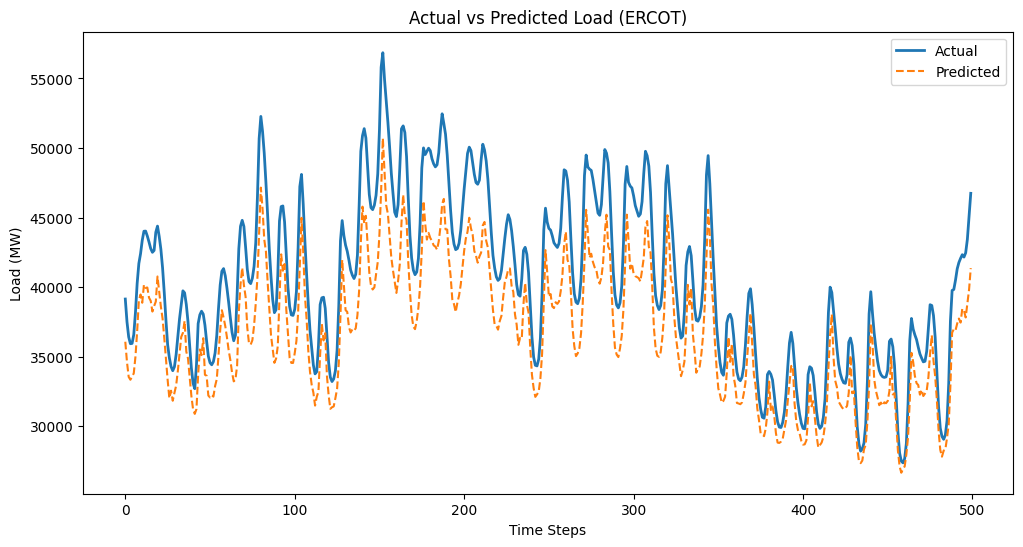

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual[:500], label='Actual', linewidth=2)
plt.plot(predictions[:500], label='Predicted', linestyle='dashed')
plt.legend()
plt.title('Actual vs Predicted Load (ERCOT)')
plt.xlabel('Time Steps')
plt.ylabel('Load (MW)')
plt.show()


In [46]:
r2 = r2_score(y_test_actual, predictions)
print(f"R²: {r2}")


R²: 0.7979717118556846


In [47]:
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
print(f"MAPE: {mape}%")


MAPE: 8.058667425108634%


In [48]:
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 3479.832035582213
RMSE: 4115.333322480137


In [49]:
# Calculate metrics
r2 = r2_score(y_test_actual, predictions)
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100

# Print results
print(f"R²: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")


R²: 0.7979717118556846
MAE: 3479.832035582213
RMSE: 4115.333322480137
MAPE: 8.058667425108634%


In [50]:
from sklearn.metrics import confusion_matrix

# Example: Convert regression predictions to classification (e.g., binary classification)
threshold = 1000  # Set a threshold for classification (e.g., high vs low load)
y_test_class = (y_test_actual > threshold).astype(int)
predictions_class = (predictions > threshold).astype(int)

cm = confusion_matrix(y_test_class, predictions_class)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[8736]]


d:\1\alpha\lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [54]:
cm


array([[8736]], dtype=int64)

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Precision, Recall, F1 Score, and Accuracy for classification
precision = precision_score(y_test_class, predictions_class)
recall = recall_score(y_test_class, predictions_class)
f1 = f1_score(y_test_class, predictions_class)
accuracy = accuracy_score(y_test_class, predictions_class)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0
